*Learn how to load, explore, clean, and prepare real datasets using Pandas*



# Wine Quality Dataset

Description:
This datasets is related to red variants of the Portuguese "Vinho Verde" wine.The dataset describes the amount of various chemicals present in wine and their effect on it's quality. The datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).Your task is to predict the quality of wine using the given data.

A simple yet challenging project, to anticipate the quality of wine.
The complexity arises due to the fact that the dataset has fewer samples, & is highly imbalanced.
Can you overcome these obstacles & build a good predictive model to classify them?

This data frame contains the following columns:

Input variables (based on physicochemical tests):\
1 - fixed acidity\
2 - volatile acidity\
3 - citric acid\
4 - residual sugar\
5 - chlorides\
6 - free sulfur dioxide\
7 - total sulfur dioxide\
8 - density\
9 - pH\
10 - sulphates\
11 - alcohol\
Output variable (based on sensory data):\
12 - quality (score between 0 and 10)

Acknowledgements:
This dataset is also available from Kaggle & UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality.

Objective:
Understand the Dataset & cleanup (if required).
Build classification models to predict the wine quality.
Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.

## Section 1. Import & Explore Data

In [2]:
import pandas as pd

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep = ";", header = 0)

In [3]:
df.head() #load first five rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape #returns 1599 rows, 12 columns (attributes)

(1599, 12)

In [5]:
df.columns #returns column names

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
df.info() #return data types & nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.describe() # summary stats (numerical) for each attributes

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Section 2. Selecting & Filtering Data

In [8]:
df['citric acid'] #select column (series)

,citric acid
0,0.00
1,0.00
2,0.04
3,0.56
4,0.00
...,...
1594,0.08
1595,0.10
1596,0.13
1597,0.12


In [9]:
df[['citric acid','chlorides']] #select multiple columns (dataframe)

,citric acid,chlorides
0,0.00,0.076
1,0.00,0.098
2,0.04,0.092
3,0.56,0.075
4,0.00,0.076
...,...,...
1594,0.08,0.090
1595,0.10,0.062
1596,0.13,0.076
1597,0.12,0.075


In [10]:
df.loc[0] #prints first row by label
df.iloc[0] # first row by index

,0
fixed acidity,7.4000
volatile acidity,0.7000
citric acid,0.0000
residual sugar,1.9000
chlorides,0.0760
free sulfur dioxide,11.0000
total sulfur dioxide,34.0000
density,0.9978
pH,3.5100
sulphates,0.5600


### filtering rows

In [11]:
df[df['volatile acidity'] > 0.5] #filter rows with higher than 0.5 acidity

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


In [12]:
df[(df['volatile acidity']>0.5) & (df["fixed acidity"] > 7.0)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1564,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1572,7.3,0.690,0.32,2.2,0.069,35.0,104.0,0.99632,3.33,0.51,9.5,5
1575,7.5,0.520,0.40,2.2,0.060,12.0,20.0,0.99474,3.26,0.64,11.8,6


## Section 3. Handling Missing Values

In [13]:
#check for nulls
df.isnull().sum() #total nulls per column

#replace or drop nulls
df['alcohol'].fillna(df['alcohol'].mean(), inplace = True) #fill with mean
df.dropna(subset=['alcohol'], inplace=True) #drop rows with null alcohol

/tmp/ipython-input-13-4020636933.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['alcohol'].fillna(df['alcohol'].mean(), inplace = True) #fill with mean


how do handle nulls:
- if only a few rows have nulls -> drop those rows: df.dropna()
- a column has a few nulls and is important -> fill with mean/median (for numbers) or mode (for categories)
- if a column has too many nulls -> drop the column: df.drop(columns=["column_name"])

## Section 4. Grouping & Aggregation
- group the data by some category, then calculate summaries (like mean, count, etc.)

In [14]:
df['quality'].unique()
#unique()는 데이터의 고유값들이 어떠한 종류들이 있는지 알고 싶을때 사용

array([5, 6, 7, 4, 8, 3])

In [15]:
df.groupby('quality').mean()
#group rows by quality scores, then calculate mean for each group

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


- use bins with pd.cut() assigns a range label to each value based on which bin it falls into

In [16]:
#create new column for alchol level
df['alcohol_level'] = pd.cut(df['alcohol'], bins=[0,9,11,14], labels=['low', 'medium', 'high'])
#group by how many wines fall into quality x alcohol level group
df.groupby(['quality','alcohol_level']).size()

/tmp/ipython-input-16-672647710.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['quality','alcohol_level']).size()


quality  alcohol_level
3        low                2
         medium             8
         high               0
4        low                2
         medium            39
         high              12
5        low               14
         medium           617
         high              49
6        low               19
         medium           414
         high             205
7        low                0
         medium            72
         high             127
8        low                0
         medium             4
         high              14
dtype: int64

### aggregate with .agg()

In [17]:
df.groupby('quality').agg({
    'alcohol': ['mean','min','max'],
    'pH':'mean'
})

alcohol                   pH
              mean  min   max      mean
quality                                
3         9.955000  8.4  11.0  3.398000
4        10.265094  9.0  13.1  3.381509
5         9.899706  8.5  14.9  3.304949
6        10.629519  8.4  14.0  3.318072
7        11.465913  9.2  14.0  3.290754
8        12.094444  9.8  14.0  3.267222

In [18]:
#count the number of rows in each group
df['quality'].value_counts().sort_index()

,count
quality,
3,10
4,53
5,681
6,638
7,199
8,18


In [20]:
df.groupby('quality').size()

,0
quality,
3,10
4,53
5,681
6,638
7,199
8,18


<Axes: xlabel='quality'>

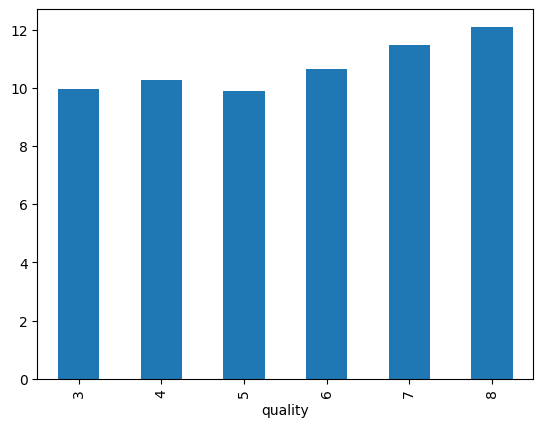

In [21]:
df.groupby('quality')['alcohol'].mean().plot(kind='bar')
#group data by quality, then select alcohol column

### parentheses [] () used differently
- [] to access columns or rows, like dictionries, dataframes
- () to call functions or methods, like mean(), plot(), groupby()

## Section 5. Creating New columns

### boolean columns

In [27]:
df['is_acidic'] = df['pH'] < 3.0
df[['pH', 'is_acidic']]

,pH,is_acidic
0,3.51,False
1,3.20,False
2,3.26,False
3,3.16,False
4,3.51,False
...,...,...
1594,3.45,False
1595,3.52,False
1596,3.42,False
1597,3.57,False


###apply custom logic row by row


In [25]:
def quality_label(score):
  if score <= 5:
    return "Low"
  elif score == 6:
    return "Medium"
  else:
    return "High"

df['quality_label'] = df['quality'].apply(quality_label
                                        )
df[['quality','quality_label']]

,quality,quality_label
0,5,Low
1,5,Low
2,5,Low
3,6,Medium
4,5,Low
...,...,...
1594,5,Low
1595,6,Medium
1596,6,Medium
1597,5,Low
